In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)

In [3]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
ticket_id                     250306 non-null int64
agency_name                   250306 non-null object
inspector_name                250306 non-null object
violator_name                 250272 non-null object
violation_street_number       250306 non-null float64
violation_street_name         250306 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    246704 non-null float64
mailing_address_str_name      250302 non-null object
city                          250306 non-null object
state                         250213 non-null object
zip_code                      250305 non-null object
non_us_str_code               3 non-null object
country                       250306 non-null object
ticket_issued_date            250306 non-null object
hearing_date                  237815 non-null object
violation_code                250306 non-null obj

In [3]:
vis_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [4]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features

array([[  1.00000000e+00,   3.05000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   7.50000000e+01,   7.80000000e+02, ...,
          4.38750000e+06,   4.56300000e+07,   4.74552000e+08],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [26]:
#mean_poly = [ x for x in poly_features[:,]]
column_means = poly_features.mean(axis=0)
column_means.argmax()

6

In [31]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date.dropna())
dt_issued_date.head()

0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
2   2004-04-26 13:40:00
3   2004-04-26 13:30:00
4   2004-04-26 13:00:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [33]:
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['is_weekend'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_weekend, dtype: bool

In [38]:
vis_data.is_weekend.value_counts()

False    248686
True       1620
Name: is_weekend, dtype: int64

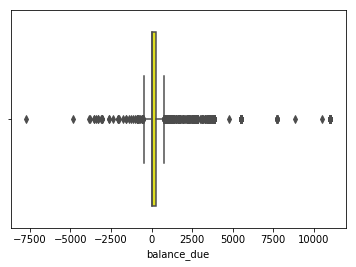

In [4]:
import seaborn as sns
sns.boxplot(vis_data.balance_due, color='yellow');

In [15]:
vis_data.balance_due.max()

11030.0

In [7]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [25]:
balance_clean = vis_data.balance_due.dropna()
print(type(balance_clean))
bd = outliers_iqr(balance_clean)
balance_clean = balance_clean.filter(bd)
balance_clean.head()

<class 'pandas.core.series.Series'>


6     855.0
9     855.0
12    855.0
13    855.0
14    855.0
Name: balance_due, dtype: float64

In [26]:
print(balance_clean.max())
print(balance_clean.min())
np.abs(balance_clean.max()-balance_clean.min())

11030.0
-7750.0


18780.0